## EDA of TMDB movies dataset

### Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

### Load Dataset 

In [34]:
df=pd.read_csv("tmdb_5000_movies.csv")

### datset overview

In [35]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [37]:
df.shape

(4803, 20)

In [38]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### check Null values

In [39]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### drop irrelevnt column and those  column which contain more null values

In [40]:
df.drop(['homepage','tagline','status','spoken_languages'], axis=1, inplace=True)

### Drop null values

In [41]:
df=df.dropna()

In [43]:
### Check duplicated rows
df.duplicated().sum()

0

In [44]:
## Drop duplicated values
df.drop_duplicates(inplace=True)

### Convert release column to proprer date formate

In [45]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

### check tottal number of movies

In [46]:
df.shape[0]

4799

### Check most common genres in dataset

In [47]:
df['genres_list'] = df['genres'].apply(lambda x: [i['name'] for i in json.loads(x.replace("'", "\""))])
genre_counts = Counter(sum(df['genres_list'], []))
print("Top Genres:", genre_counts.most_common(5))

Top Genres: [('Drama', 2296), ('Comedy', 1722), ('Thriller', 1274), ('Action', 1154), ('Romance', 894)]


### check top 10 highest rated movies on the basis of orignal title and vote average

In [48]:
df[['original_title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)

,original_title,vote_average
4247,Me You and Five Bucks,10.0
4662,Little Big Top,10.0
4045,"Dancer, Texas Pop. 81",10.0
3519,Stiff Upper Lips,10.0
3992,Sardaarji,9.5
2386,One Man's Hero,9.3
1881,The Shawshank Redemption,8.5
2970,There Goes My Baby,8.5
2796,The Prisoner of Zenda,8.4
3337,The Godfather,8.4


### Check average budget and revenue

In [49]:
print("Average Budget:", df['budget'].mean())
print("Average Revenue:", df['revenue'].mean())

Average Budget: 29065933.219212335
Average Revenue: 82329203.46822254


#### bar chart of most common genres

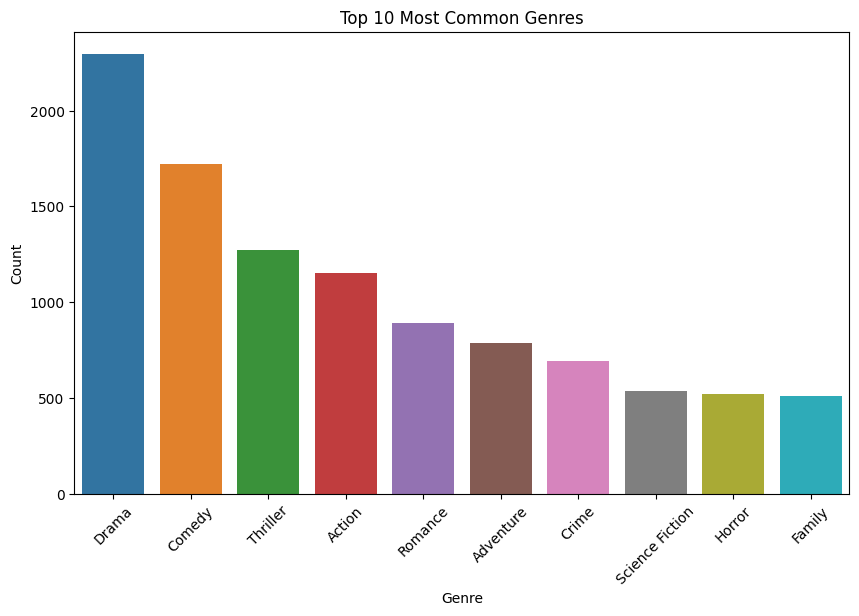

In [50]:
genre_df = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Genre', y='Count')
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=45)
plt.show()

### Use pie chart to to analyz the rating distribution od movies

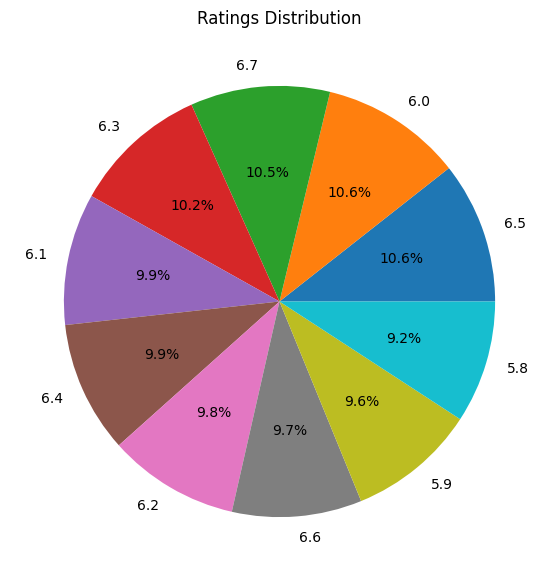

In [51]:
plt.figure(figsize=(7,7))
df['vote_average'].value_counts().head(10).plot.pie(autopct='%1.1f%%')
plt.title('Ratings Distribution')
plt.ylabel('')
plt.show()

### Movies release per  year  

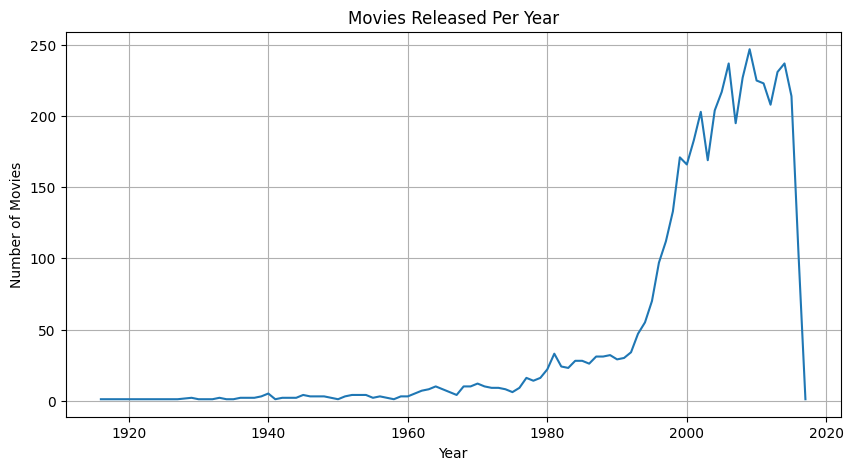

In [52]:
movies_per_year = df['release_year'].value_counts().sort_index()
movies_per_year.plot(kind='line', figsize=(10,5))
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()

### Correlation Heatmap

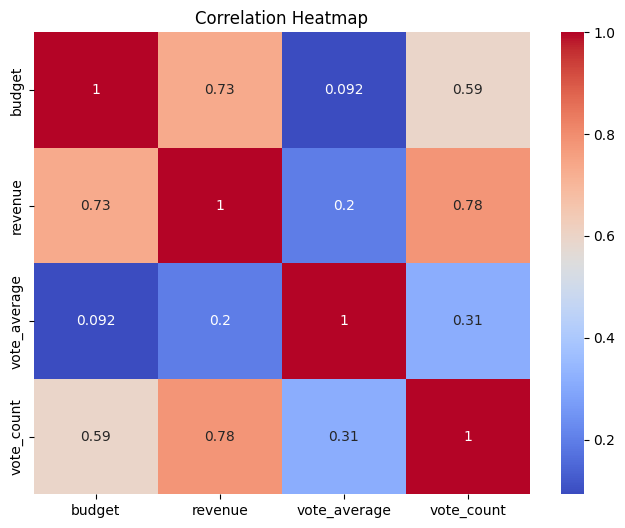

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['budget', 'revenue', 'vote_average', 'vote_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#  Key Insights from EDA on TMDB Movie Dataset

1. *Drama, Comedy, and Action* are the most frequently occurring genres, showing audience preference toward emotionally engaging and entertaining content.

2. There is a *positive correlation between movie budget and revenue*, meaning movies with higher budgets tend to earn more — but not always.

3. The *average rating (vote_average)* of movies clusters around 6–7, indicating most movies received moderate to good audience reception.

4. *The number of movies released per year increased steadily until 2015*, suggesting rapid growth in film production in the last two decades.

5. Some *top-rated movies do not generate high revenue*, highlighting that critical success (ratings) doesn’t always guarantee box-office success.